In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('questions.csv',on_bad_lines='skip')

In [4]:
df.shape

(49848, 6)

In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
46133,46133,91858,91859.0,How I can be good at handwriting?,What are the ways in which I can improve my ha...,1.0
8826,8826,17628,17629.0,Is kissing good for health?,Is flirting good for health?,0.0
2455,2455,4910,4911.0,Why are Indians obsessed with God and religion?,Are Indians so obsessed with the notion of rel...,1.0
6842,6842,13666,13667.0,What is hydrogen perchlorate?,How flammable is hydrogen?,0.0
37828,37828,75369,75370.0,Why do hackers generally use MacBooks for hack...,Why do Russian hackers hack into the U.S.?,0.0
38307,38307,76319,76320.0,"Which shrinks more and faster, steel or tungst...",When a block of steel and aluminium are weighe...,0.0
39317,39317,78322,78323.0,Do you think scrapping of 500 and 1000 rupee d...,How is discontinuing 500 and 1000 rupee note g...,1.0
43930,43930,87485,87486.0,Why did the British support Jews to establish ...,Why did the British support the Jews in fighti...,1.0
2395,2395,4790,4791.0,I emailed my interviewer after the technical i...,I have applied for the Thought Works company t...,0.0
14598,14598,29141,29142.0,What's the best way to ask someone to not date...,How do I ask someone on a date?,0.0


In [11]:
df=df.sample(30000,random_state=42)

In [12]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,1
question1,1
question2,1
is_duplicate,1


In [13]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
48401,48401,96362,96363.0,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1.0
41852,41852,83359,83360.0,What is your view on the move to scrap 500 and...,What do you think about banning 500 and 1000 r...,1.0
20303,20303,40509,40510.0,What is the main reason of mr. Raghuram rajan'...,What is the reason behind Raghuram Rajan's exit?,1.0
15547,15547,31033,31034.0,What is the difference between intelligence an...,What is the difference between education and i...,1.0
14265,14265,28477,28478.0,"How can I get laid in India, Chandigarh or any...",How do I get laid in India?,1.0


In [14]:
df.duplicated().sum()

0

is_duplicate
0.0    18853
1.0    11146
Name: count, dtype: int64
is_duplicate
0.0    62.845428
1.0    37.154572
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

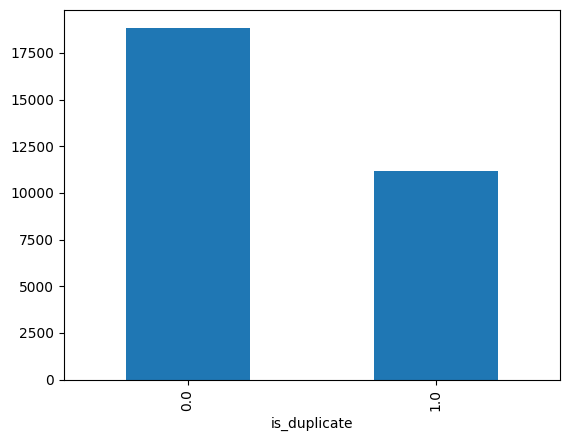

In [15]:
# Distribution of duplicate and non-duplicate questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [16]:
# Repeated Questions
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique question: ',qid.nunique())
a=qid.value_counts()>1
print('Number of repeated questions: ',a[a].count())

Number of unique question:  59815
Number of repeated questions:  173


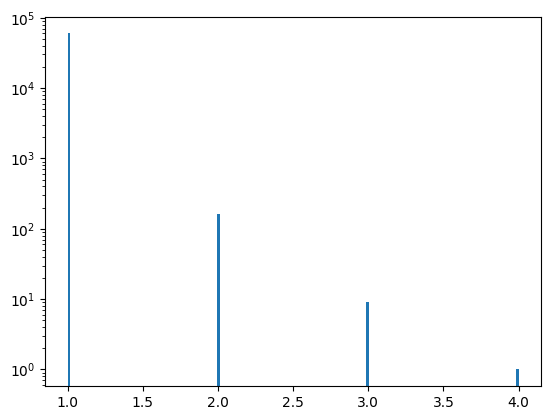

In [17]:
# Repeated question histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [18]:
# Feature Engineering
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()

In [19]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
48401,48401,96362,96363.0,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1.0,123.0,125.0
41852,41852,83359,83360.0,What is your view on the move to scrap 500 and...,What do you think about banning 500 and 1000 r...,1.0,90.0,66.0
20303,20303,40509,40510.0,What is the main reason of mr. Raghuram rajan'...,What is the reason behind Raghuram Rajan's exit?,1.0,69.0,48.0
15547,15547,31033,31034.0,What is the difference between intelligence an...,What is the difference between education and i...,1.0,58.0,58.0
14265,14265,28477,28478.0,"How can I get laid in India, Chandigarh or any...",How do I get laid in India?,1.0,66.0,27.0


In [21]:
# Num of Words
df['q1_num_words'] = df['question1'].astype(str).apply(lambda row: len(row.split(' ')))
df['q2_num_words'] = df['question2'].astype(str).apply(lambda row: len(row.split(' ')))

In [22]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
48401,48401,96362,96363.0,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1.0,123.0,125.0,21,21
41852,41852,83359,83360.0,What is your view on the move to scrap 500 and...,What do you think about banning 500 and 1000 r...,1.0,90.0,66.0,19,13
20303,20303,40509,40510.0,What is the main reason of mr. Raghuram rajan'...,What is the reason behind Raghuram Rajan's exit?,1.0,69.0,48.0,12,8
15547,15547,31033,31034.0,What is the difference between intelligence an...,What is the difference between education and i...,1.0,58.0,58.0,8,8
14265,14265,28477,28478.0,"How can I get laid in India, Chandigarh or any...",How do I get laid in India?,1.0,66.0,27.0,13,7


In [25]:
# Common_word
def common_word(row):
    w1 = set(map(lambda word: word.lower().strip(), str(row['question1']).split(' '))) # Convert to string before splitting
    w2 = set(map(lambda word: word.lower().strip(), str(row['question2']).split(' '))) # Convert to string before splitting
    return len(w1 & w2)

In [26]:
df['word_common']=df.apply(common_word,axis=1)

In [27]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
48401,48401,96362,96363.0,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1.0,123.0,125.0,21,21,16
41852,41852,83359,83360.0,What is your view on the move to scrap 500 and...,What do you think about banning 500 and 1000 r...,1.0,90.0,66.0,19,13,5
20303,20303,40509,40510.0,What is the main reason of mr. Raghuram rajan'...,What is the reason behind Raghuram Rajan's exit?,1.0,69.0,48.0,12,8,6
15547,15547,31033,31034.0,What is the difference between intelligence an...,What is the difference between education and i...,1.0,58.0,58.0,8,8,6
14265,14265,28477,28478.0,"How can I get laid in India, Chandigarh or any...",How do I get laid in India?,1.0,66.0,27.0,13,7,5


In [28]:
# Total word
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), str(row['question1']).split(' '))) # Convert to string before splitting
    w2 = set(map(lambda word: word.lower().strip(), str(row['question2']).split(' '))) # Convert to string before
    return (len(w1) + len(w2))


In [29]:
df['word_total']=df.apply(total_words,axis=1)

In [30]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
48401,48401,96362,96363.0,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1.0,123.0,125.0,21,21,16,36
41852,41852,83359,83360.0,What is your view on the move to scrap 500 and...,What do you think about banning 500 and 1000 r...,1.0,90.0,66.0,19,13,5,31
20303,20303,40509,40510.0,What is the main reason of mr. Raghuram rajan'...,What is the reason behind Raghuram Rajan's exit?,1.0,69.0,48.0,12,8,6,20
15547,15547,31033,31034.0,What is the difference between intelligence an...,What is the difference between education and i...,1.0,58.0,58.0,8,8,6,16
14265,14265,28477,28478.0,"How can I get laid in India, Chandigarh or any...",How do I get laid in India?,1.0,66.0,27.0,13,7,5,20


In [31]:
# Word Share
df['word_share']=round(df['word_common']/df['word_total'],2)


In [32]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
48401,48401,96362,96363.0,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1.0,123.0,125.0,21,21,16,36,0.44
41852,41852,83359,83360.0,What is your view on the move to scrap 500 and...,What do you think about banning 500 and 1000 r...,1.0,90.0,66.0,19,13,5,31,0.16
20303,20303,40509,40510.0,What is the main reason of mr. Raghuram rajan'...,What is the reason behind Raghuram Rajan's exit?,1.0,69.0,48.0,12,8,6,20,0.30
15547,15547,31033,31034.0,What is the difference between intelligence an...,What is the difference between education and i...,1.0,58.0,58.0,8,8,6,16,0.38
14265,14265,28477,28478.0,"How can I get laid in India, Chandigarh or any...",How do I get laid in India?,1.0,66.0,27.0,13,7,5,20,0.25


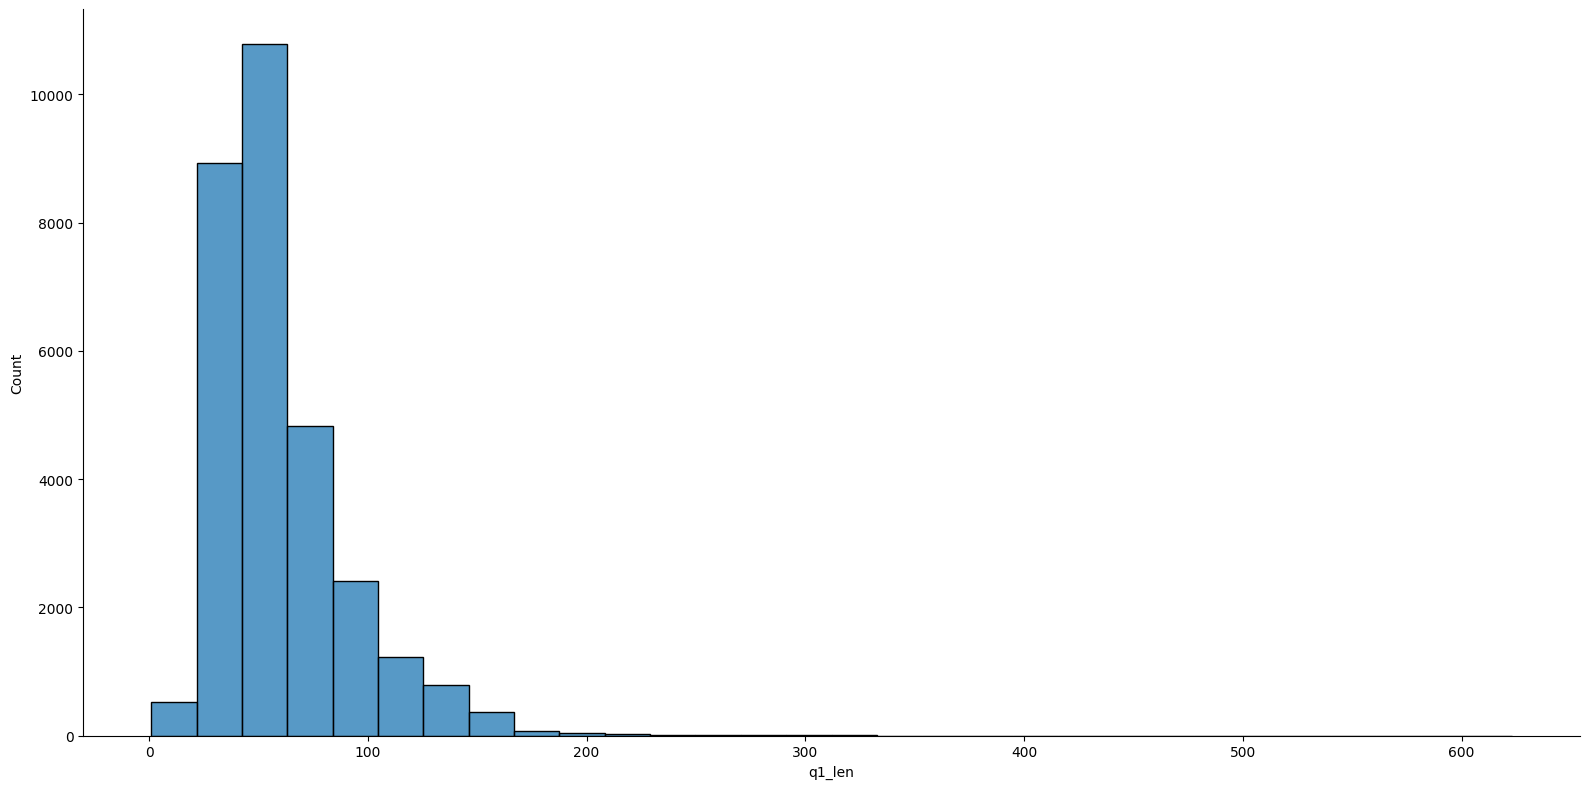

In [33]:
# Analysis of features
sns.displot(df,x='q1_len',bins=30,aspect=2,height=8)
plt.show()

In [38]:
# max min char
print('minimum char',df['q1_len'].min())
print('maximum char',df['q1_len'].max())
print('average num of char',round(df['q1_len'].mean(),2))

minimum char 1.0
maximum char 623.0
average num of char 59.39


In [39]:
# max min char
print('minimum char',df['q2_len'].min())
print('maximum char',df['q2_len'].max())
print('average num of char',round(df['q2_len'].mean(),2))

minimum char 6.0
maximum char 1169.0
average num of char 60.08


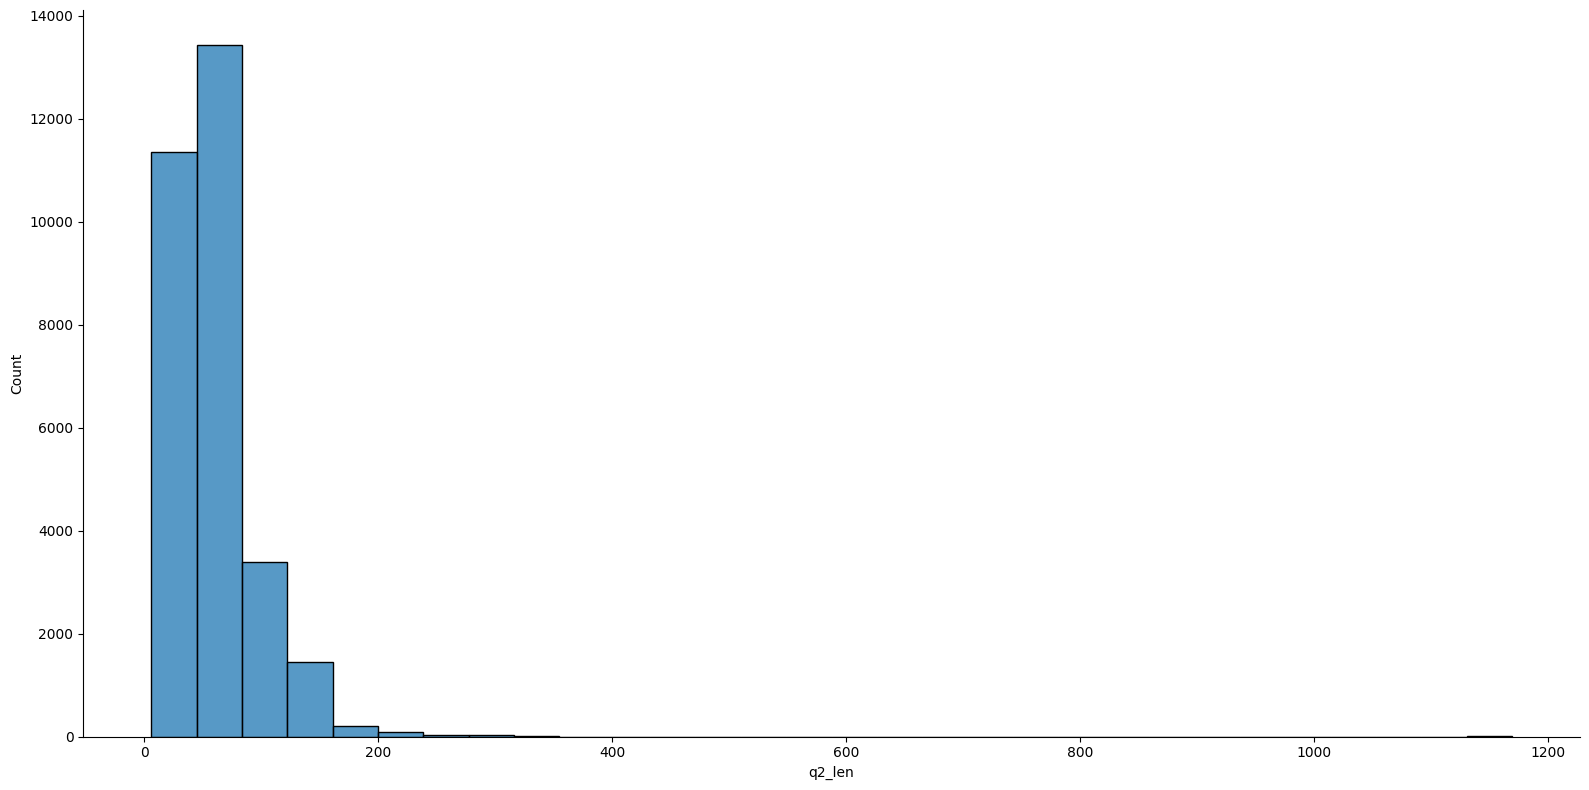

In [40]:
# Analysis of features
sns.displot(df,x='q2_len',bins=30,aspect=2,height=8)
plt.show()

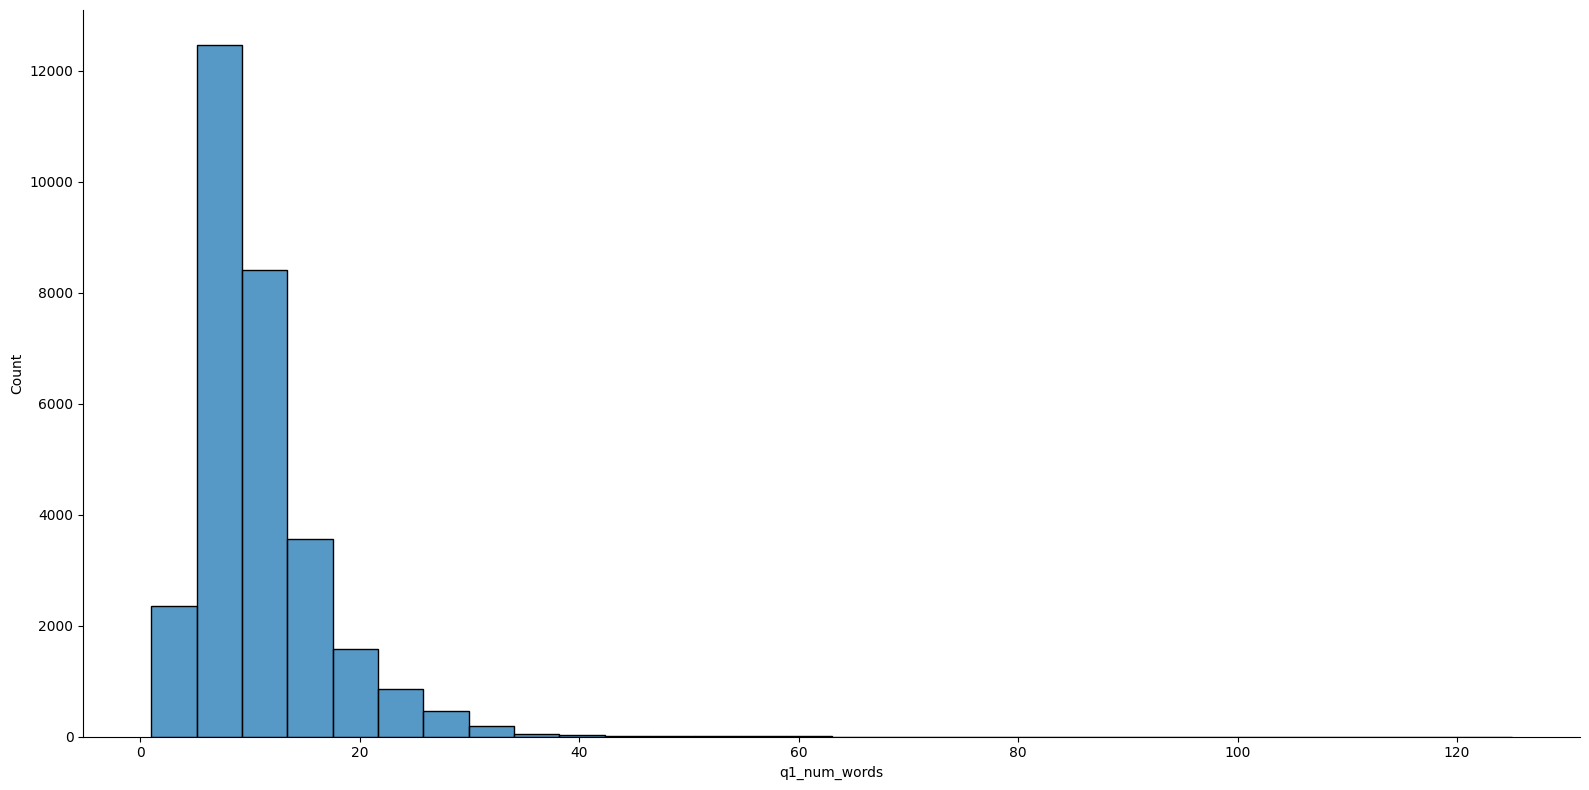

In [41]:
# Analysis q1_num_words
sns.displot(df,x='q1_num_words',bins=30,aspect=2,height=8)
plt.show()

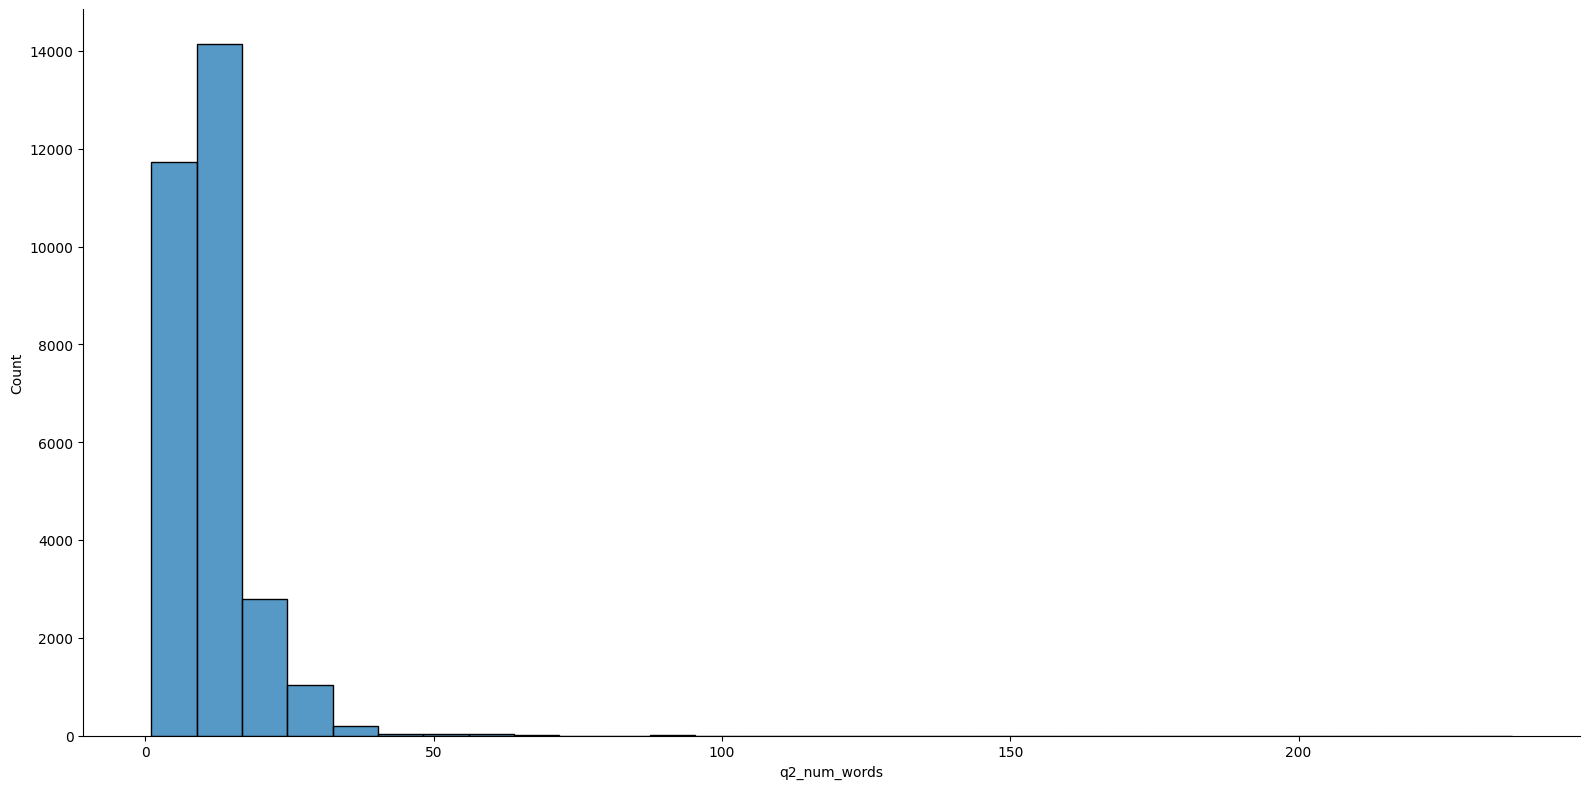

In [42]:
# Analysis q2_num_words
sns.displot(df,x='q2_num_words',bins=30,aspect=2,height=8)
plt.show()

In [43]:
print('minimum words',df['q1_num_words'].min())
print('maximum words',df['q1_num_words'].max())
print('average num of words',round(df['q1_num_words'].mean(),2))

minimum words 1
maximum words 125
average num of words 10.92


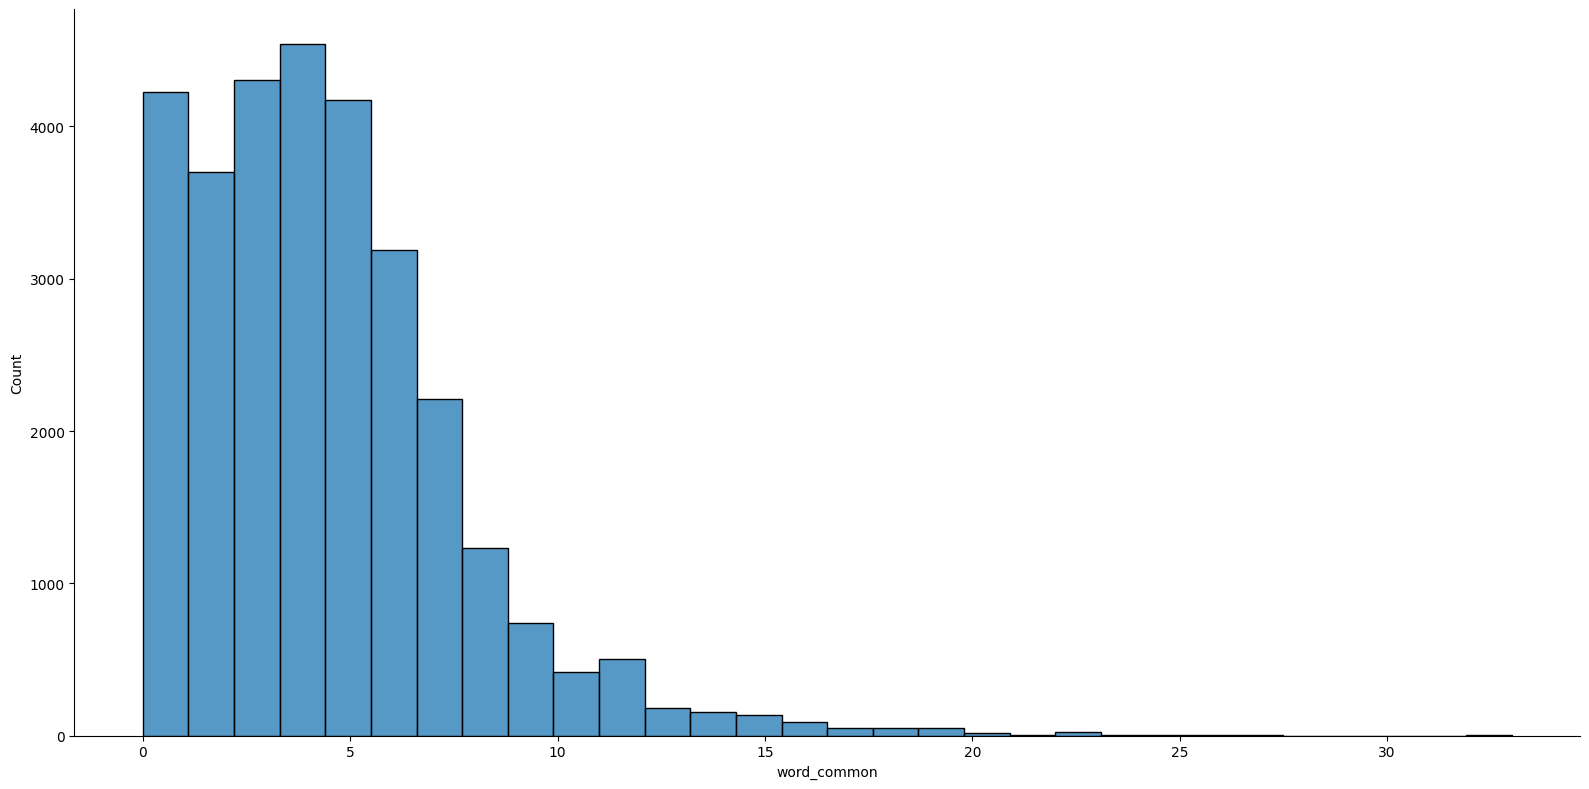

In [44]:
# Common words
sns.displot(df,x='word_common',bins=30,aspect=2,height=8)
plt.show()

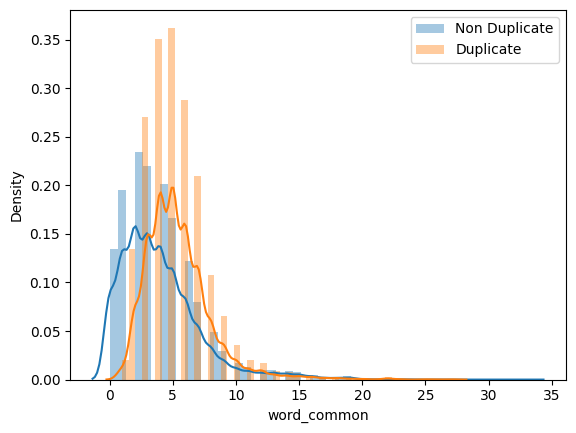

In [45]:
# is_duplicate and non duplicate compare dist plot
sns.distplot(df[df['is_duplicate']==0]['word_common'],label='Non Duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_common'],label='Duplicate')
plt.legend()
plt.show()

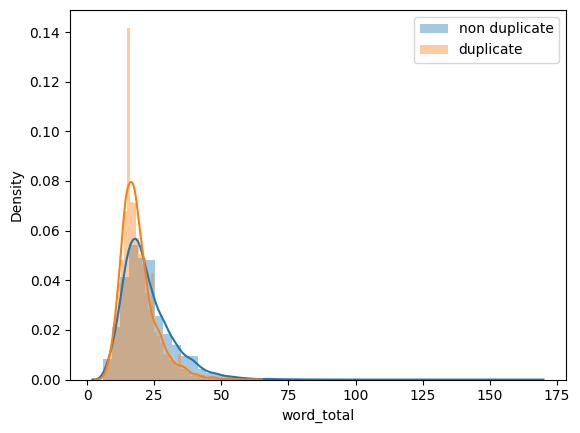

In [47]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

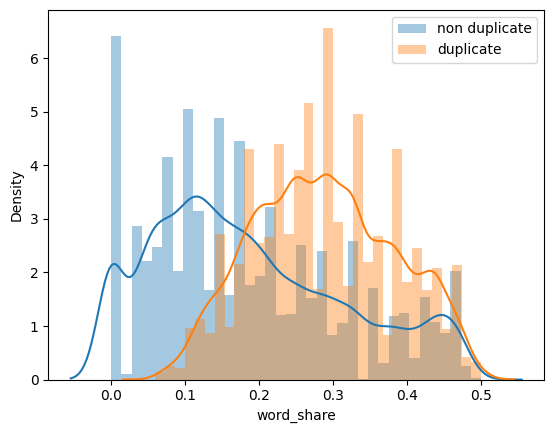

In [48]:
# Word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()

In [49]:
ques_df=df[['question1','question2']]
ques_df.head()

,question1,question2
48401,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...
41852,What is your view on the move to scrap 500 and...,What do you think about banning 500 and 1000 r...
20303,What is the main reason of mr. Raghuram rajan'...,What is the reason behind Raghuram Rajan's exit?
15547,What is the difference between intelligence an...,What is the difference between education and i...
14265,"How can I get laid in India, Chandigarh or any...",How do I get laid in India?


In [50]:
final_df=df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
48401,1.0,123.0,125.0,21,21,16,36,0.44
41852,1.0,90.0,66.0,19,13,5,31,0.16
20303,1.0,69.0,48.0,12,8,6,20,0.30
15547,1.0,58.0,58.0,8,8,6,16,0.38
14265,1.0,66.0,27.0,13,7,5,20,0.25


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions=list(ques_df['question1'].fillna(''))+list(ques_df['question2'].fillna(''))
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [53]:
print(q1_arr.shape)
print(q2_arr.shape)

(30000, 3000)
(30000, 3000)


In [56]:
print(q1_arr)
print(q2_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)

In [58]:
temp_df.shape

(30000, 6000)

In [60]:

final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
48401,1.0,123.0,125.0,21,21,16,36,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
41852,1.0,90.0,66.0,19,13,5,31,0.16,0,0,...,0,1,0,0,0,0,0,0,0,0
20303,1.0,69.0,48.0,12,8,6,20,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
15547,1.0,58.0,58.0,8,8,6,16,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0
14265,1.0,66.0,27.0,13,7,5,20,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)


In [64]:
# Impute missing values using the mean strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)  # Use the same imputer fitted on training data


In [66]:
# Handle missing values in y_train (if any)
imputer_y = SimpleImputer(strategy='most_frequent') # For classification, it's generally better to impute with most frequent class
y_train = imputer_y.fit_transform(y_train.reshape(-1, 1)) # Imputer expects 2D array
y_test = imputer_y.transform(y_test.reshape(-1, 1))
y_test=y_test.ravel() # Convert back to 1D array
y_train = y_train.ravel() # Convert back to 1D array

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix # Import confusion_matrix
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)



In [71]:
print(accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred) # Now you can call the function

0.7661666666666667


array([[3307,  466],
       [ 937, 1290]])

In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)


In [79]:
accuracy_score(y_test,y_pred)

0.7703333333333333

In [80]:
confusion_matrix(y_test,y_pred)

array([[3112,  661],
       [ 717, 1510]])

In [81]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred)

0.6913333333333334

In [83]:
confusion_matrix(y_test,y_pred)

array([[3095,  678],
       [1174, 1053]])

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [85]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.742

In [88]:

confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0   0.0   1.0
row_0            
0.0    3081   692
1.0     856  1371


In [89]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.6826666666666666

In [90]:
confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0   0.0  1.0
row_0           
0.0    3099  674
1.0    1230  997


# Advance Features

## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy